<a href="https://colab.research.google.com/github/Namanm23/Deep-Learning-Codes/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


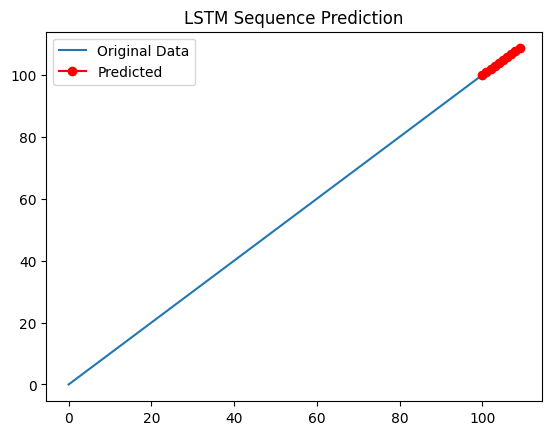

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Create dummy sequential data: e.g., [0,1,2,...,99]
data = np.array([i for i in range(100)])

# Prepare data for LSTM: input = 5 previous steps, output = next step
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_sequences(data, window_size)

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X, y, epochs=200, verbose=0)

# Predict future values
# Predict future values
test_input = data[-window_size:].reshape((1, window_size, 1))
predicted = []
for _ in range(10):  # predict next 10 steps|
    next_val = model.predict(test_input, verbose=0)
    predicted.append(next_val[0, 0])
    # Fix: Remove extra dimension from next_val and use concatenate instead of append
    test_input = np.concatenate([test_input[:, 1:, :], next_val.reshape(1, 1, 1)], axis=1)
# Plot
plt.plot(data, label="Original Data")
plt.plot(range(100, 110), predicted, 'ro-', label="Predicted")
plt.legend()
plt.title("LSTM Sequence Prediction")
plt.show()
